<a href="https://colab.research.google.com/github/leksangpelkey/Kaggle/blob/main/Kagglemoviedataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [79]:
import pandas as pd

In [80]:
import numpy as np

In [81]:
import matplotlib.pyplot as plt

In [82]:
%matplotlib inline

In [83]:
import seaborn as sns

**Loading dataframe**

In [87]:
 url = 'https://raw.githubusercontent.com/leksangpelkey/capstone/main/Movie-Dataset-Latest.csv?token=GHSAT0AAAAAABPWOJWNZLBMDEPCHLVOY63MYPHOL4Q'

In [88]:
df = pd.read_csv(url, index_col=0)

In [89]:
df.shape

(9463, 8)

In [90]:
df.head()

,id,title,release_date,overview,popularity,vote_average,vote_count,video
0,19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False
1,278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False
2,238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False
3,724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False
4,424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False


**Changing the Index**

In [91]:
df['id'].is_unique

True

In [92]:
df= df.set_index('id')


In [93]:
df.head()

,title,release_date,overview,popularity,vote_average,vote_count,video
id,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False
724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False
424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False


In [100]:
df.isnull

<bound method DataFrame.isnull of                               title release_date  ... vote_count  video
id                                                ...                  
19404   Dilwale Dulhania Le Jayenge   1995-10-20  ...       3304  False
278        The Shawshank Redemption   1994-09-23  ...      20369  False
238                   The Godfather   1972-03-14  ...      15219  False
724089    Gabriel's Inferno Part II   2020-07-31  ...       1360  False
424                Schindler's List   1993-11-30  ...      12158  False
...                             ...          ...  ...        ...    ...
13805                Disaster Movie   2008-08-29  ...        787  False
5491              Battlefield Earth   2000-05-12  ...        628  False
11059             House of the Dead   2003-04-11  ...        281  False
14164          Dragonball Evolution   2009-03-12  ...       1584  False
40016    Birdemic: Shock and Terror   2010-02-27  ...        237  False

[9463 rows x 7 columns]>

In [101]:
df.dtypes

title            object
release_date     object
overview         object
popularity      float64
vote_average    float64
vote_count        int64
video              bool
dtype: object

**Renaming columns**

In [109]:
new_df = df.rename(columns={'title':'Movie', 'release_date': 'Release','popularity':'Popularity', 'vote_average':'Rating','vote_count': 'Votes'})
df

,Movie,Release,overview,Popularity,Rating,Votes,video,Year
id,,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False,1995-
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False,1994-
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False,1972-
724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False,2020-
424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False,1993-
...,...,...,...,...,...,...,...,...
13805,Disaster Movie,2008-08-29,"The filmmaking team behind the hits ""Scary Mov...",12.121,3.2,787,False,2008-
5491,Battlefield Earth,2000-05-12,"In the year 3000, man is no match for the Psyc...",10.200,3.2,628,False,2000-
11059,House of the Dead,2003-04-11,"Set on an island off the coast, a techno rave ...",8.120,3.2,281,False,2003-


**Augment data with additional columns**

In [112]:
new_df['Year']= new_df['Release'].str[0:4]

In [114]:
new_df['Year'] = pd.to_numeric(new_df['Year'])
new_df.head()

,Movie,Release,overview,Popularity,Rating,Votes,video,Year
id,,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False,1995
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False,1994
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False,1972
724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False,2020
424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False,1993


**Which are the top 3 movies which has the highest ratings?**

In [120]:
new_df['Rating'].unique()

array([8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. , 7.9, 7.8, 7.7, 7.6, 7.5,
       7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7, 6.6, 6.5, 6.4, 6.3, 6.2,
       6.1, 6. , 5.9, 5.8, 5.7, 5.6, 5.5, 5.4, 5.3, 5.2, 5.1, 5. , 4.9,
       4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.7, 3.3, 3.2,
       2.8, 2.2])

In [121]:
new_df[new_df['Rating']>=8.7].head(3)

,Movie,Release,overview,Popularity,Rating,Votes,video,Year
id,,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False,1995
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False,1994
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False,1972


In [127]:
new_df['Year'].unique()

array([1995, 1994, 1972, 2020, 1993, 1974, 2021, 2013, 2016, 2001, 2019,
       1957, 1999, 2008, 2003, 1966, 2000, 1988, 1954, 1990, 1997, 1984,
       2011, 1960, 1975, 2002, 1962, 2018, 2004, 1950, 1980, 2014, 1998,
       1952, 1940, 2010, 1963, 1931, 1985, 1936, 1991, 1989, 1953, 1968,
       1964, 1979, 2012, 1948, 1970, 1946, 2017, 1971, 1921, 2009, 1945,
       1958, 1977, 1924, 2006, 1976, 1927, 1961, 1959, 1965, 1944, 1983,
       1943, 1992, 1996, 1987, 1955, 2015, 1956, 1949, 2007, 1928, 2005,
       1981, 1926, 1973, 1941, 1978, 1925, 1982, 1986, 1969, 1939, 1902,
       1920, 1947, 1951, 1942, 1934, 1967, 1923, 1937, 1932, 1930, 1922,
       1938, 1933, 1935, 1929, 1918, 1916, 1903, 1915])

**Name all the movies that were realeased between 2015 and 2020, have a rating above 8.0 but made below the 25th percentile in popularity**

In [149]:
new_df[
       ((new_df['Year']>=2015)&(new_df['Year']<=2020))
        &(new_df['Rating']>8.0)
        &(new_df['Popularity']<new_df['Popularity'].quantile(0.25))
       ]

,Movie,Release,overview,Popularity,Rating,Votes,video,Year
id,,,,,,,,
640344,Me contro Te: Il film - La vendetta del Signor S,2020-01-17,A new adventure for Luì and Sofi (Me contro Te...,4.699,8.4,426,False,2020
620683,My Mom is a Character 3,2019-12-26,Dona Hermínia will have to rediscover and rein...,5.239,8.3,400,False,2019
400608,Bo Burnham: Make Happy,2016-06-03,Combining his trademark wit and self-deprecati...,8.278,8.2,253,False,2016
529531,Hannah Gadsby: Nanette,2018-06-19,The Australian comedian Hannah Gadsby is takin...,8.306,8.2,215,False,2018
455661,In a Heartbeat,2017-06-01,A closeted boy runs the risk of being outed by...,6.593,8.1,883,False,2017
538362,On My Skin,2018-09-12,The incredible true story behind the most cont...,8.671,8.1,1674,False,2018
574074,Kitbull,2019-01-18,An unlikely connection sparks between two crea...,6.845,8.1,240,False,2019
406785,Inner Workings,2016-11-23,This is the story of the internal struggle bet...,7.955,8.1,207,False,2016


**Applying Functions**

In [151]:
def rating_function(x):
  if x>=8.0:
    return "good"
  else:
    return "bad"

The .apply() method passes every value in the rating column through the rating_function and then returns a new Series is then assigned to a new column called rating_ctaegory.

In [154]:
new_df['Rating_category']= new_df['Rating'].apply(rating_function)
new_df.head()

,Movie,Release,overview,Popularity,Rating,Votes,video,Year,Rating_category
id,,,,,,,,,
19404,Dilwale Dulhania Le Jayenge,1995-10-20,"Raj is a rich, carefree, happy-go-lucky second...",25.884,8.7,3304,False,1995,good
278,The Shawshank Redemption,1994-09-23,Framed in the 1940s for the double murder of h...,60.110,8.7,20369,False,1994,good
238,The Godfather,1972-03-14,"Spanning the years 1945 to 1955, a chronicle o...",62.784,8.7,15219,False,1972,good
724089,Gabriel's Inferno Part II,2020-07-31,Professor Gabriel Emerson finally learns the t...,28.316,8.6,1360,False,2020,good
424,Schindler's List,1993-11-30,The true story of how businessman Oskar Schind...,38.661,8.6,12158,False,1993,good


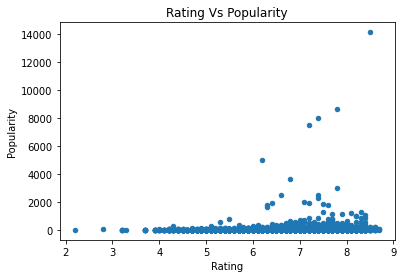

In [156]:
new_df.plot(kind='scatter', x='Rating', y='Popularity', title= 'Rating Vs Popularity')